In [1]:
!pip install wooldridge

In [2]:
import wooldridge as woo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# importação dos dados
data = woo.dataWoo('vote1')

In [4]:
data.head()

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473


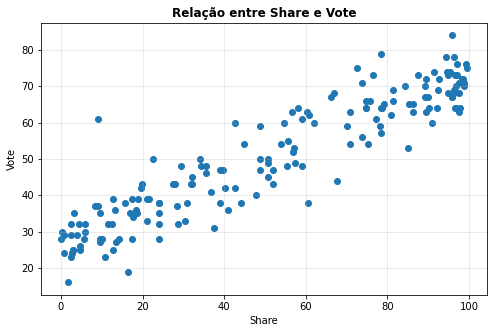

In [5]:
# Ajusta o tamanho da Figura
plt.figure(figsize=(8, 5))

# scatter plot
plt.scatter('shareA', 'voteA', data=data)

# labels
plt.title('Relação entre Share e Vote', fontweight='bold')
plt.xlabel('Share')
plt.ylabel('Vote')

# configura GridLines
plt.grid(alpha=0.3)
plt.show()

In [7]:
# Define a feature do Modelo
X = data.shareA.values.reshape(-1, 1)

# Define a target do Modelo
y = data.voteA.values.reshape(-1, 1)

# Separa os dados em treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

In [9]:
# Instância o Modelo
linear_model = LinearRegression()

# Treina o Modelo
# Calcular os pesos, os parâmetros da minha Regressão Linear
linear_model.fit(X_train, y_train)

LinearRegression()

### Agora podemos obter os pesos que foram estimados no modelo:

In [10]:
# Intercepto do Modelo - Onde a reta vai cortar o y (Vote)
linear_model.intercept_

array([26.65758556])

In [12]:
# Parâmetro de inclinação (Peso/Parâmetro de Vote em relação a Share)
linear_model.coef_

array([[0.45764906]])

In [14]:
# Previsões do Modelo
y_pred = linear_model.predict(X_train)

# Resíduo do Modelo (Diferença entre o valor REAL e o valor Ajustado)
resid = y_train - y_pred

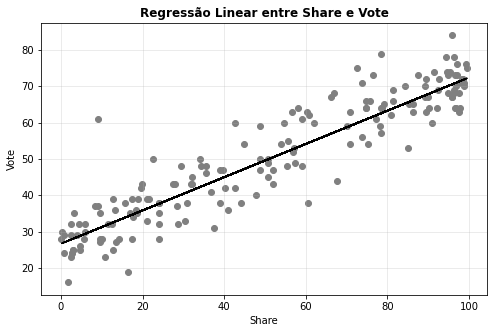

In [16]:
# Ajusta o tamanho da figura
plt.figure(figsize=(8, 5))
# Scatter Plot
plt.scatter('shareA', 'voteA', data=data, color='gray')
# Modelo
plt.plot(X_train, y_pred, color='black')
# Labels
plt.title('Regressão Linear entre Share e Vote', fontweight='bold')
plt.xlabel('Share')
plt.ylabel('Vote')
# Configura Gridlines
plt.grid(alpha=0.3)
plt.show()